In [11]:
import lightkurve as lk
import matplotlib.pyplot as plt
import math
from astropy.io import ascii
import numpy as np
from scipy.optimize import curve_fit
from glob import glob
import pandas as pd
import os
from astropy.io import fits

In [12]:
#gp
# ---
gp_data = ascii.read('/Users/mschochet/Desktop/MSU_PHD/lco_aumic/lcs_posttwirl/gp.xls')
gp_data.sort(keys='rel_flux_T1')
gp_badfiles = [str(val) for val in list(gp_data[:2]['Label'])]

gp_cleaned = gp_data[2:] # Remove any frames where AIJ misplaced the aperture and T1 or C2 fluxes are negative/near-0
gp_cleaned.sort(keys='J.D.-2400000')
gp_d, gp_aum_flux, gp_c1_flux = gp_cleaned['J.D.-2400000'], gp_cleaned['rel_flux_T1'], gp_cleaned['rel_flux_C2']
# ---


In [13]:
#ip
# ---
ip_data = ascii.read('/Users/mschochet/Desktop/MSU_PHD/lco_aumic/lcs_posttwirl/ip.xls')
ip_data.sort(keys='rel_flux_T1')
ip_badfiles = [str(val) for val in list(ip_data[:28]['Label'])]
ip_badfiles.append(ip_data[len(ip_data)-1]["Label"])

ip_cleaned = ip_data[28:len(ip_data)-1] # Same as above but there is a +40 value out of nowhere, don't think that is real
ip_cleaned.sort(keys='J.D.-2400000')
ip_d, ip_aum_flux, ip_c1_flux = ip_cleaned['J.D.-2400000'], ip_cleaned['rel_flux_T1'], ip_cleaned['rel_flux_C2']
# ---

In [14]:
#rp
# ---
rp_data = ascii.read('/Users/mschochet/Desktop/MSU_PHD/lco_aumic/lcs_posttwirl/rp.xls')
rp_data.sort(keys='rel_flux_T1')
rp_badfiles = [str(val) for val in list(rp_data[:1]['Label'])]

rp_cleaned = rp_data[1:] # Same as above but there is only one bad value
rp_cleaned.sort(keys='J.D.-2400000')
rp_d, rp_aum_flux, rp_c1_flux = rp_cleaned['J.D.-2400000'], rp_cleaned['rel_flux_T1'], rp_cleaned['rel_flux_C2']
# ---

In [15]:
#U
# ---
U_data = ascii.read('/Users/mschochet/Desktop/MSU_PHD/lco_aumic/lcs_posttwirl/U.xls')
U_data.sort(keys='rel_flux_T1')
U_badfiles = [str(val) for val in list(U_data[(len(U_data))-13:]['Label'])]
U_badfiles.append(U_data[0]["Label"])
U_badfiles.append(U_data[1]["Label"])


U_cleaned = U_data[2:(len(U_data))-13]# Same as above but there are 13 values with substantially too large flux values, and 2 with values too low 
U_cleaned.sort(keys='J.D.-2400000')
U_d, U_aum_flux, U_c1_flux = U_cleaned['J.D.-2400000'], U_cleaned['rel_flux_T1'], U_cleaned['rel_flux_C2']
# ---

In [16]:
#B
# ---
B_data = ascii.read('/Users/mschochet/Desktop/MSU_PHD/lco_aumic/lcs_posttwirl/B.xls')

B_cleaned = B_data.copy()
B_cleaned.sort(keys='J.D.-2400000')
B_d, B_aum_flux, B_c1_flux = B_cleaned['J.D.-2400000'], B_cleaned['rel_flux_T1'], B_cleaned['rel_flux_C2']
# ---

In [17]:
#V
# ---
V_data = ascii.read('/Users/mschochet/Desktop/MSU_PHD/lco_aumic/lcs_posttwirl/V.xls')

V_cleaned = V_data.copy()
V_cleaned.sort(keys='J.D.-2400000')
V_d, V_aum_flux, V_c1_flux = V_cleaned['J.D.-2400000'], V_cleaned['rel_flux_T1'], V_cleaned['rel_flux_C2']
# ---

In [18]:
gpmeansnr = np.median(gp_cleaned['rel_flux_SNR_T1'])
rpmeansnr = np.median(rp_cleaned['rel_flux_SNR_T1'])
ipmeansnr = np.median(ip_cleaned['rel_flux_SNR_T1'])
Umeansnr = np.median(U_cleaned['rel_flux_SNR_T1'])
Bmeansnr = np.median(B_cleaned['rel_flux_SNR_T1'])
Vpmeansnr = np.median(V_cleaned['rel_flux_SNR_T1'])

print("gp, rp, ip, U, B, V \n")
gpmeansnr, rpmeansnr, ipmeansnr, Umeansnr, Bmeansnr, Vpmeansnr

gp, rp, ip, U, B, V 



(np.float64(820.4283041649392),
 np.float64(1343.2150634008588),
 np.float64(1415.290199628929),
 np.float64(90.03546119846885),
 np.float64(45.759088385653385),
 np.float64(140.83814387170116))

## Only works with file drive plugged in

In [19]:
# This accounts for files lost by twirl and with bad AIJ values, but to catch the ones that crashed AIJ I need to compare

ip_files_postaij = sorted([str(val) for val in list(ip_data['Label'])])
post_aij_ip = pd.DataFrame({"ip": ip_files_postaij})

rp_files_postaij = sorted([str(val) for val in list(rp_data['Label'])])
post_aij_rp = pd.DataFrame({"rp": rp_files_postaij})


files_preaijip = sorted(glob("/Volumes/harddrive/ip/aligned/*.fits"))
files_preaijrp = sorted(glob("/Volumes/harddrive/rp/aligned/*.fits"))

pre_aij_ip = pd.DataFrame({"ip": files_preaijip}) #, "ip_pre":files_preaijip, "rp_post":rp_files_postaij, "ip_post":ip_files_postaij})
ip_files_onlyname = [str(os.path.basename(val)) for val in (pre_aij_ip['ip'])]
pre_aij_ip = pd.DataFrame({"ip": ip_files_onlyname})

pre_aij_rp = pd.DataFrame({"rp": files_preaijrp}) #, "ip_pre":files_preaijip, "rp_post":rp_files_postaij, "ip_post":ip_files_postaij})
rp_files_onlyname = [str(os.path.basename(val)) for val in (pre_aij_rp['rp'])]
pre_aij_rp = pd.DataFrame({"rp": rp_files_onlyname})


# This will print out all the files. Find the ones with NaNs to find the ones that caused AIJ to fail
# AIJ Failed rp
lister = [bool(np.isnan(val)) for val in pre_aij_rp['rp'].value_counts() - post_aij_rp['rp'].value_counts()]

rp_badfiles_2 = [str(val) for val in pre_aij_rp[lister]['rp'].values.tolist()]

with open('bad_rpfiles.txt', 'w') as f:
    for item in rp_badfiles+rp_badfiles_2:
        new_string = item.replace("aligned_", "")
        f.write(new_string + '\n')

# AIJ Failed ip
lister2 = [bool(np.isnan(val)) for val in pre_aij_ip['ip'].value_counts() - post_aij_ip['ip'].value_counts()]
pre_aij_ip[lister2]

ip_badfiles_2 = [str(val) for val in pre_aij_ip[lister2]['ip'].values.tolist()]


with open('bad_ipfiles.txt', 'w') as f:
    for item in ip_badfiles+ip_badfiles_2:
        new_string = item.replace("aligned_", "")
        f.write(new_string + '\n')

ValueError: Item wrong length 471 instead of 0.

## Simple scipy.curvefit on the light curve

In [20]:
def model(t, X, theta):
    return X*np.sin(((2*np.pi*t)/4.86) + theta)

In [21]:
gp_y = gp_aum_flux
gp_x = gp_d
gp_coeff, gp_cov = curve_fit(model, gp_x, gp_y)

xrange_gp = np.linspace(min(gp_x), max(gp_x), 100)
yfit_gp = model(xrange_gp, *gp_coeff)


print(f"Optimal parameters (gp): X={gp_coeff[0]:.2f}, theta={gp_coeff[1]:.2f}")
print(f"The covariance matrix is {gp_cov[0]} \n                         {gp_cov[1]}") # 7 tabs

Optimal parameters (gp): X=1.41, theta=1.67
The covariance matrix is [0.41016341 0.04161147] 
                         [0.04161147 0.26734311]


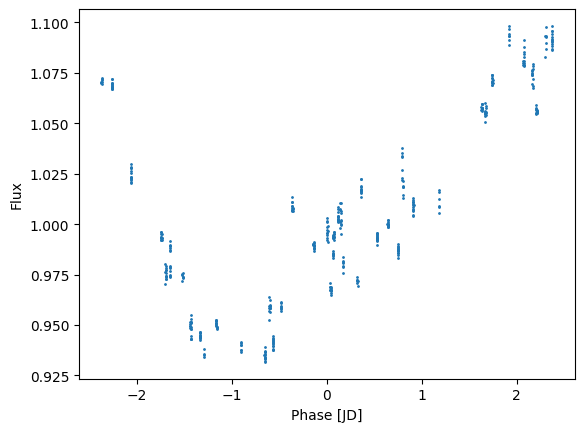

In [22]:
xrange_gp = np.linspace(min(gp_x), max(gp_x), 100)
yfit_gp = model(xrange_gp, *gp_coeff)

dataog_gp =  lk.LightCurve(flux=gp_y, time=gp_x)#-np.median(gp_y)#.#()
dataogfold_gp = dataog_gp.fold(4.86)
dataogfold_gp /= np.median(dataogfold_gp[(dataogfold_gp['time'] > 0.5) &  (dataogfold_gp['time'] < 1.0)]['flux'])# normalize by vals 0.5-1


datafit = lk.LightCurve(flux=yfit_gp, time=xrange_gp)
datafitfold = datafit.fold(4.86, epoch_time = gp_d.min(), epoch_phase=gp_coeff[1])
fig, ax = plt.subplots()
dataogfold_gp.scatter(ax=ax)
#datafitfold.scatter(ax=ax, c='r')
plt.show()

In [23]:
ip_y = ip_aum_flux
ip_x = ip_d
ip_coeff, ip_cov = curve_fit(model, ip_x, ip_y)

# Print the optimal parameters
print(f"Optimal parameters (ip): X={ip_coeff[0]:.2f}, theta={ip_coeff[1]:.2f}")
print(f"The covariance matrix is {ip_cov[0]} \n                         {ip_cov[1]}") # 7 tabs

Optimal parameters (ip): X=4.52, theta=1.50
The covariance matrix is [1.73252355 0.00427232] 
                         [0.00427232 0.10317417]


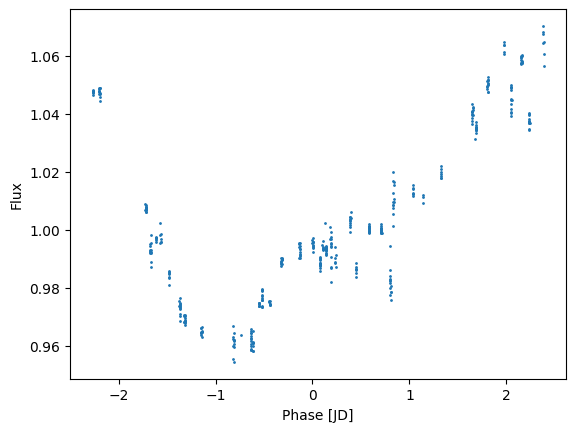

In [24]:
xrange_ip = np.linspace(min(ip_x), max(ip_x), 100)
yfit_ip = model(xrange_ip, *ip_coeff)

dataog_ip =  lk.LightCurve(flux=ip_y, time=ip_x)#- np.median(ip_y)
dataogfold_ip = dataog_ip.fold(4.86)
dataogfold_ip /= np.median(dataogfold_ip[(dataogfold_ip['time'] > 0.5) &  (dataogfold_ip['time'] < 1.0)]['flux'])# normalize by vals 0.5-1

datafit = lk.LightCurve(flux=yfit_ip, time=xrange_ip)
datafitfold = datafit.fold(4.86, epoch_time = ip_d.min(), epoch_phase=ip_coeff[1])
fig, ax = plt.subplots()
dataogfold_ip.scatter(ax=ax)
#datafitfold.scatter(ax=ax, c='r')
plt.show()

Optimal parameters (rp): X=2.32, theta=1.55
The covariance matrix is [0.70645247 0.02362544] 
                         [0.02362544 0.16700208]


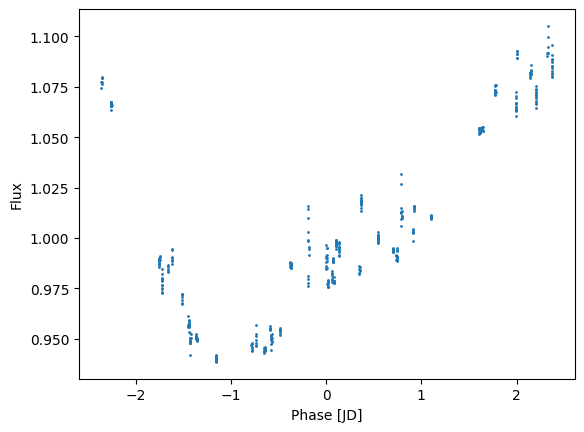

In [25]:
rp_y = rp_aum_flux
rp_x = rp_d
rp_coeff, rp_cov = curve_fit(model, rp_x, rp_y)

print(f"Optimal parameters (rp): X={rp_coeff[0]:.2f}, theta={rp_coeff[1]:.2f}")
print(f"The covariance matrix is {rp_cov[0]} \n                         {rp_cov[1]}") # 7 tabs
xrange_rp = np.linspace(min(rp_x), max(rp_x), 100)
yfit_rp = model(xrange_rp, *rp_coeff)

dataog_rp =  lk.LightCurve(flux=rp_y, time=rp_x)# -np.median(rp_y)
dataogfold_rp = dataog_rp.fold(4.86)
dataogfold_rp /= np.median(dataogfold_rp[(dataogfold_rp['time'] > 0.5) &  (dataogfold_rp['time'] < 1.0)]['flux'])# normalize by vals 0.5-1

datafit = lk.LightCurve(flux=yfit_rp, time=xrange_rp)
datafitfold = datafit.fold(4.86, epoch_time = rp_d.min(), epoch_phase=rp_coeff[1])
fig, ax = plt.subplots()
dataogfold_rp.scatter(ax=ax)
#datafitfold.scatter(ax=ax, c='r')
plt.show()

Optimal parameters (rp): X=8.47, theta=0.97
The covariance matrix is [0.28217644 0.00343568] 
                         [0.00343568 0.01581571]


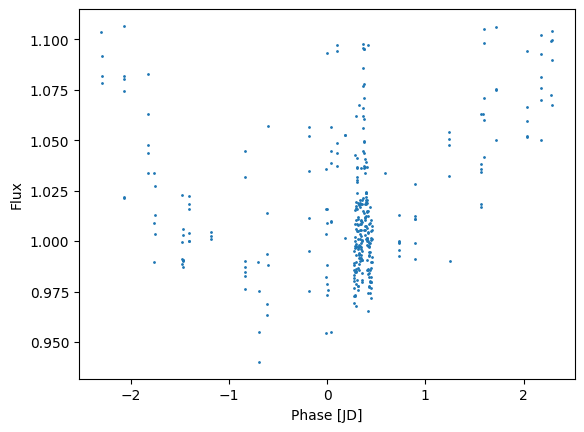

In [26]:
U_y = U_aum_flux
U_x = U_d
U_coeff, U_cov = curve_fit(model, U_x, U_y)

print(f"Optimal parameters (rp): X={U_coeff[0]:.2f}, theta={U_coeff[1]:.2f}")
print(f"The covariance matrix is {U_cov[0]} \n                         {U_cov[1]}") # 7 tabs
xrange_U = np.linspace(min(U_x), max(U_x), 100)
yfit_U = model(xrange_U, *U_coeff)

dataog_U =  lk.LightCurve(flux = U_y, time=U_x)# -np.median(U_y)
dataogfold_U = dataog_U.fold(4.86)
dataogfold_U /= np.median(dataogfold_U[(dataogfold_U['time'] > 0.5) &  (dataogfold_U['time'] < 1.0)]['flux'])# normalize by vals 0.5-1

datafit = lk.LightCurve(flux=yfit_U, time=xrange_U)
datafitfold = datafit.fold(4.86, epoch_time = U_d.min(), epoch_phase=U_coeff[1])
fig, ax = plt.subplots()
dataogfold_U.scatter(ax=ax)
#datafitfold.scatter(ax=ax, c='r')
plt.show()

Optimal parameters (rp): X=2.65, theta=2.23
The covariance matrix is [1.7111275  0.11523301] 
                         [0.11523301 0.21749264]


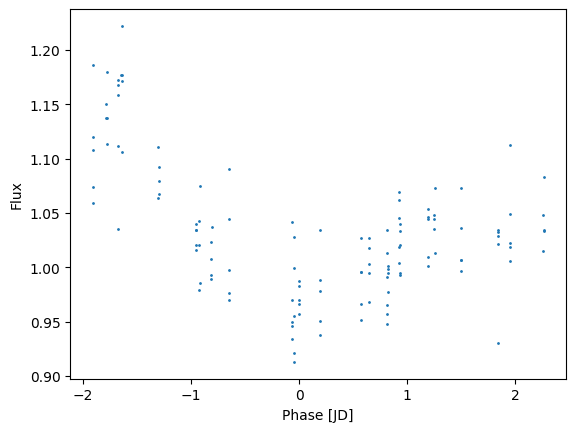

In [27]:
B_y = B_aum_flux
B_x = B_d
B_coeff, B_cov = curve_fit(model, B_x, B_y)

print(f"Optimal parameters (rp): X={B_coeff[0]:.2f}, theta={B_coeff[1]:.2f}")
print(f"The covariance matrix is {B_cov[0]} \n                         {B_cov[1]}") # 7 tabs
xrange_B = np.linspace(min(B_x), max(B_x), 100)
yfit_B = model(xrange_B, *B_coeff)

dataog_B =  lk.LightCurve(flux = B_y, time=B_x)#-np.median(B_y)
dataogfold_B = dataog_B.fold(4.86)
dataogfold_B /= np.median(dataogfold_B[(dataogfold_B['time'] > 0.5) &  (dataogfold_B['time'] < 1.0)]['flux'])# normalize by vals 0.5-1

datafit = lk.LightCurve(flux=yfit_B, time=xrange_B)
datafitfold = datafit.fold(4.86, epoch_time = B_d.min(), epoch_phase=B_coeff[1])
fig, ax = plt.subplots()
dataogfold_B.scatter(ax=ax)
#datafitfold.scatter(ax=ax, c='r')
plt.show()

In [28]:
np.median(dataogfold_B[(dataogfold_B['time'] > 0.5) &  (dataogfold_B['time'] < 1.0)]['flux'])

<Quantity 1.>

Optimal parameters (rp): X=-1.22, theta=-0.10
The covariance matrix is [2.13656777 0.08484863] 
                         [0.08484863 1.22921177]


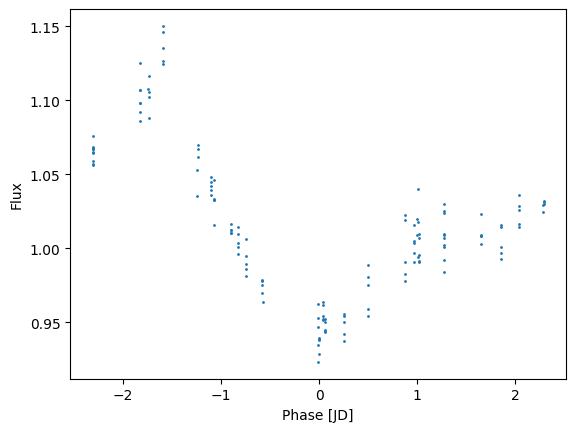

In [29]:
V_y = V_aum_flux
V_x = V_d
V_coeff, V_cov = curve_fit(model, V_x, V_y)

print(f"Optimal parameters (rp): X={V_coeff[0]:.2f}, theta={V_coeff[1]:.2f}")
print(f"The covariance matrix is {V_cov[0]} \n                         {V_cov[1]}") # 7 tabs
xrange_V = np.linspace(min(V_x), max(V_x), 100)
yfit_V = model(xrange_V, *V_coeff)

dataog_V =  lk.LightCurve(flux = V_y, time=V_x)# -np.median(V_y)
dataogfold_V = dataog_V.fold(4.86)
dataogfold_V /= np.median(dataogfold_V[(dataogfold_V['time'] > 0.5) &  (dataogfold_V['time'] < 1.0)]['flux'])# normalize by vals 0.5-1


datafitV = lk.LightCurve(flux=yfit_V, time=xrange_V)
datafitfoldV = datafitV.fold(4.86, epoch_time = V_d.min(), epoch_phase=V_coeff[1])
fig, ax = plt.subplots()
dataogfold_V.scatter(ax=ax)
#datafitfoldV.scatter(ax=ax, c='r')
plt.show()

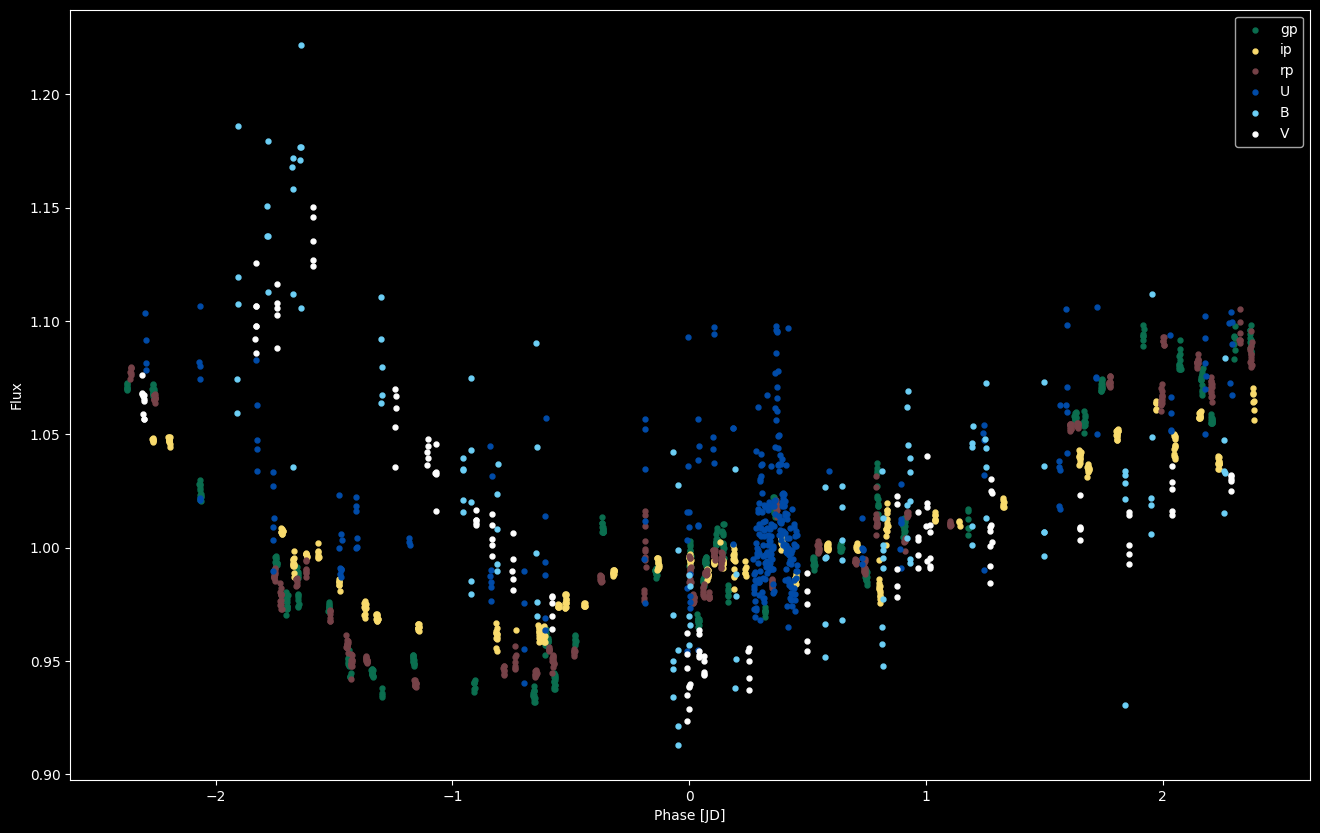

In [33]:
fig, ax = plt.subplots(figsize=(16, 10))

dataogfold_gp.scatter(ax=ax, label='gp', c='#0B6E4F', s=50)
dataogfold_ip.scatter(ax=ax, label='ip', c='#F9DB6D', s=50)
dataogfold_rp.scatter(ax=ax, label='rp', c='#764248', s=50)
dataogfold_U.scatter(ax=ax, label='U', c="#004BA8", s=50)
dataogfold_B.scatter(ax=ax, label='B' , c="#6CCFF6", s=50)
dataogfold_V.scatter(ax=ax, label='V' , c="#FFFFFF", s=50)

ax.legend()

<Axes: xlabel='Time [JD]', ylabel='Flux'>

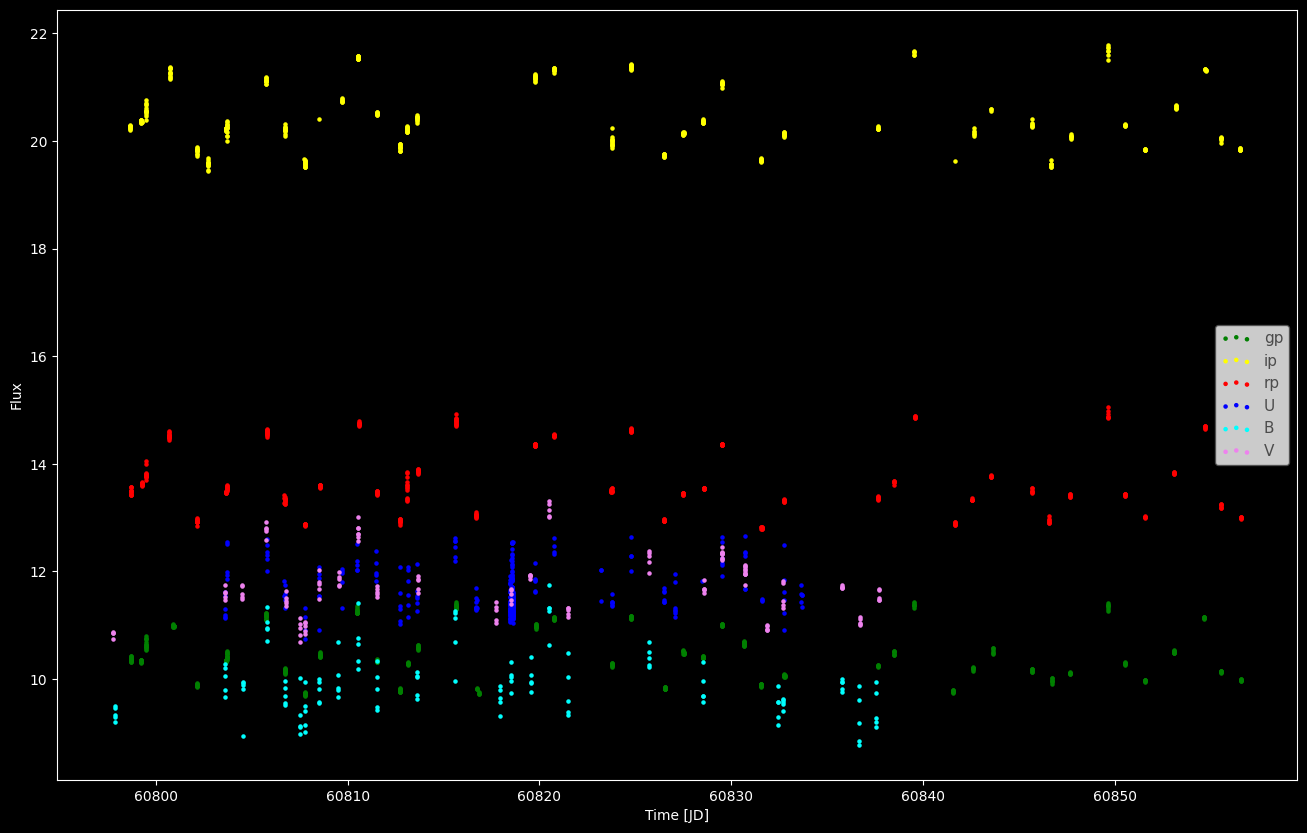

In [32]:
fig, ax = plt.subplots(figsize=(16,10))
plt.style.use('dark_background')
#fig.set_facecolor('black')
dataog_gp.scatter(ax=ax, label='gp', c='green', s=20)
dataog_ip.scatter(ax=ax, label='ip', c='yellow', s=20)
dataog_rp.scatter(ax=ax, label='rp', c='red', s=20)
dataog_U.scatter(ax=ax, label='U', c='blue', s=20)
dataog_B.scatter(ax=ax, label='B', c='cyan', s=20)
dataog_V.scatter(ax=ax, label='V', c='violet', s=20)
